In [1]:
#conda install -c anaconda pandas 
#conda install -c anaconda numpy 
#conda install scikit-learn
#conda install -c conda-forge matplotlib 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#setting working directory
import os
os.getcwd()
os.chdir('/Users/akailwoo/Desktop/Ounass/DS/20190706_DS_ppt/data')

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
x = df.loc[:,['YearsExperience']]
y = df.loc[:,['Salary']]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (10, 1), (20, 1), (10, 1))

In [ ]:
type(x_train), type(y_train)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, o

In [11]:
regressor.intercept_, regressor.coef_

(array([26816.19224403]), array([[9345.94244312]]))

#### R2 calculation & Adjusted R2

In [12]:
r2 = regressor.score(x_test, y_test)

In [13]:
print(r2)

0.9749154407708353


In [14]:
#sample size n
n = df.shape[0]

In [15]:
#number of predictors = 1
p = 1

In [16]:
r2 - (1 - r2)*((n-1)/(n-p-1))

0.9489350044263432

#### MAPE calculation

In [17]:
y_pred = regressor.predict(x_test)

In [18]:
y_pred = pd.DataFrame({'Column1':y_pred[:,0]})

In [19]:
out = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),y_pred], axis = 1, ignore_index  = True)

In [20]:
out.columns = ['x_test','y_test', 'y_pred']

In [21]:
out

,x_test,y_test,y_pred
0,1.5,37731.0,40835.105909
1,10.3,122391.0,123079.399408
2,4.1,57081.0,65134.556261
3,3.9,63218.0,63265.367772
4,9.5,116969.0,115602.645454
5,8.7,109431.0,108125.891499
6,9.6,112635.0,116537.239698
7,4.0,55794.0,64199.962017
8,5.3,83088.0,76349.687193
9,7.9,101302.0,100649.137545


In [22]:
out["mape"] = abs(out["y_test"]-out["y_pred"])/out['y_test']

In [23]:
out

,x_test,y_test,y_pred,mape
0,1.5,37731.0,40835.105909,0.082269
1,10.3,122391.0,123079.399408,0.005625
2,4.1,57081.0,65134.556261,0.141090
3,3.9,63218.0,63265.367772,0.000749
4,9.5,116969.0,115602.645454,0.011681
5,8.7,109431.0,108125.891499,0.011926
6,9.6,112635.0,116537.239698,0.034645
7,4.0,55794.0,64199.962017,0.150661
8,5.3,83088.0,76349.687193,0.081099
9,7.9,101302.0,100649.137545,0.006445


In [24]:
out["mape"].mean()

0.052618976821925664

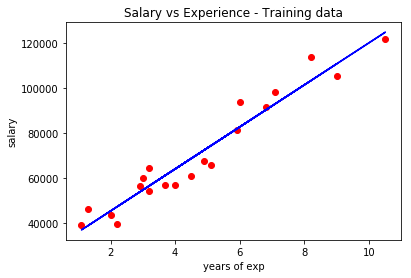

In [25]:
#Visualzing plots
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience - Training data')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.show()